<a href="https://colab.research.google.com/github/UNT-CSCE-Project/sentiment-classification-of-amazon-reviews/blob/dev_avijeet/Copy_of_sentiment_classification_amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install transformers torch

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
### Connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:


### import csv from google dir
def connect_and_fetch_file():


  file_id = "1ZBezHHtxu8L6pZVeOtaC0-_n3MjOYnGR"

  file_dir = f'https://drive.google.com/uc?id={file_id}'
  return file_dir
file_dir = connect_and_fetch_file()



In [64]:
import pandas as pd

df = pd.read_csv(file_dir)


<ipython-input-64-d4830fe90155>:3: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_dir)


In [65]:
df_updated = df.copy()  # Create a copy to keep the original DataFrame
df_updated.columns = [col[len('reviews.'):] if col.startswith('reviews.') else col for col in df.columns]


In [66]:
df_updated=df_updated[[ 'doRecommend',  'numHelpful', 'rating',  'text', 'title']]

## Data Visualization


In [95]:
import re
from collections import Counter
import matplotlib.pyplot as plt



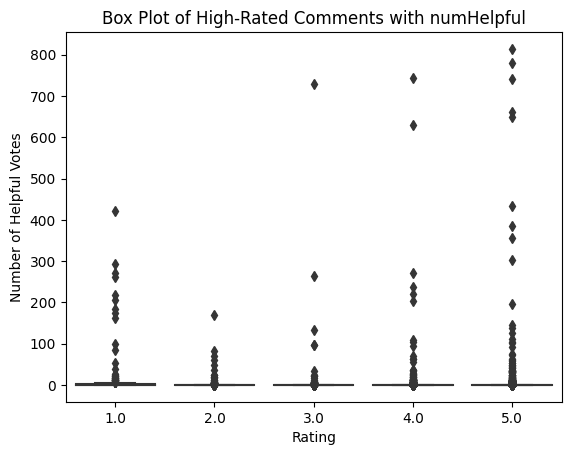

In [68]:
import seaborn as sns
high_rated_df = df_updated[df_updated['rating'] >= 1]
sns.boxplot(x='rating', y='numHelpful', data=high_rated_df, palette='viridis')
plt.title('Box Plot of High-Rated Comments with numHelpful')
plt.xlabel('Rating')
plt.ylabel('Number of Helpful Votes')
plt.show()

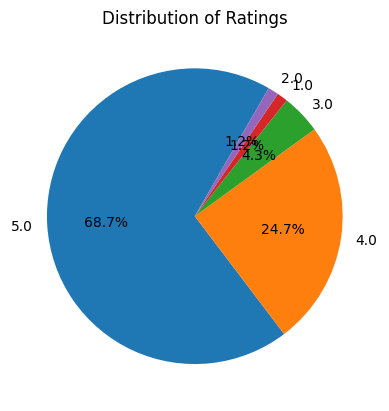

In [69]:
rating_counts = df_updated['rating'].value_counts()
labels = rating_counts.index
sizes = rating_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)
plt.title('Distribution of Ratings')
plt.show()

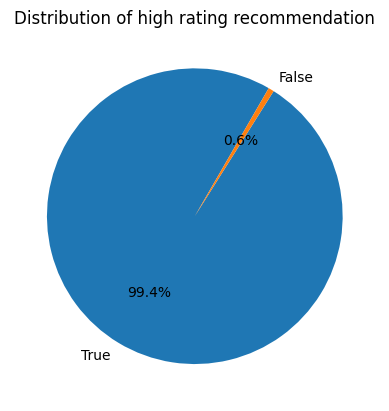

In [70]:
recommendedHighRatingDf= df_updated[ (df_updated['rating']>=4)]
rating_counts = recommendedHighRatingDf['doRecommend'].value_counts()
labels = rating_counts.index
sizes = rating_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)
plt.title('Distribution of high rating recommendation')
plt.show()

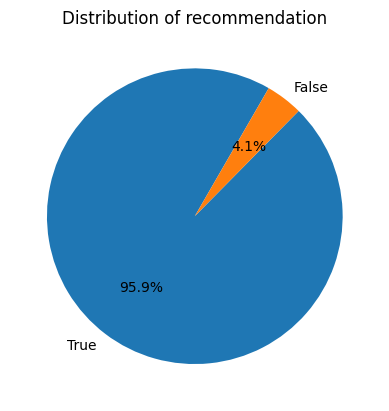

In [71]:
rating_counts = df_updated['doRecommend'].value_counts()
labels = rating_counts.index
sizes = rating_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)
plt.title('Distribution of recommendation')
plt.show()

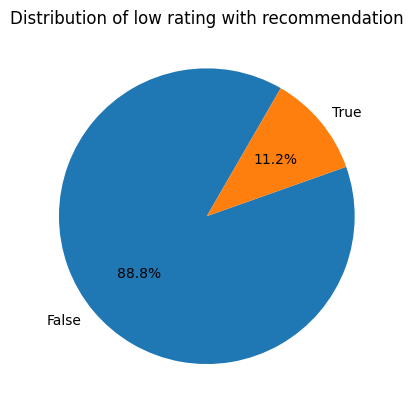

In [72]:
recommendedLowRatingDf= df_updated[ (df_updated['rating']<3)]
rating_counts = recommendedLowRatingDf['doRecommend'].value_counts()
labels = rating_counts.index
sizes = rating_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)
plt.title('Distribution of low rating with recommendation')
plt.show()




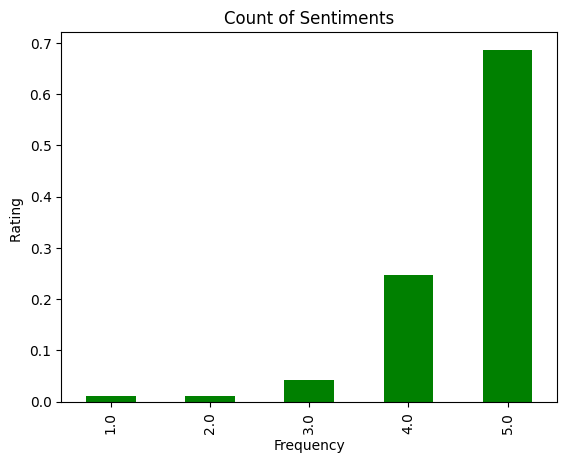

In [73]:
df_updated['rating'].value_counts(normalize=True).sort_index().plot(kind='bar', color= 'green')
plt.ylabel('Rating ')
plt.xlabel('Frequency')
plt.title('Count of Sentiments');




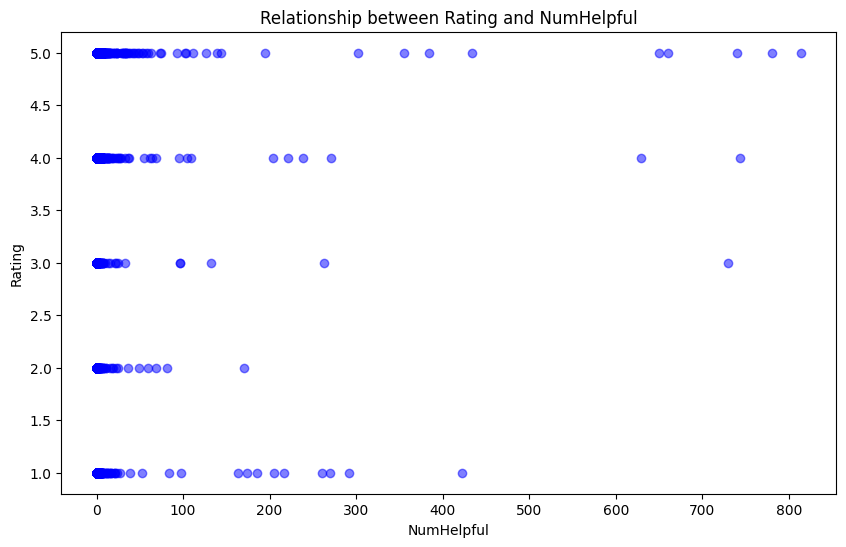

In [75]:



plt.figure(figsize=(10, 6))
plt.scatter(df_updated['numHelpful'], df_updated['rating'],color='blue', alpha=0.5)
plt.title('Relationship between Rating and NumHelpful')
plt.ylabel('Rating')
plt.xlabel('NumHelpful')
plt.show()




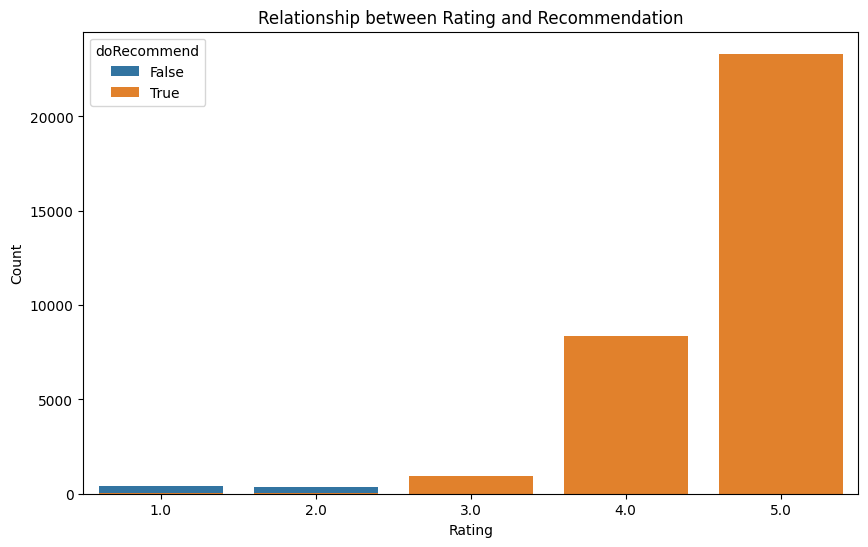

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='doRecommend', data=df_updated, dodge=False)
plt.title('Relationship between Rating and Recommendation')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

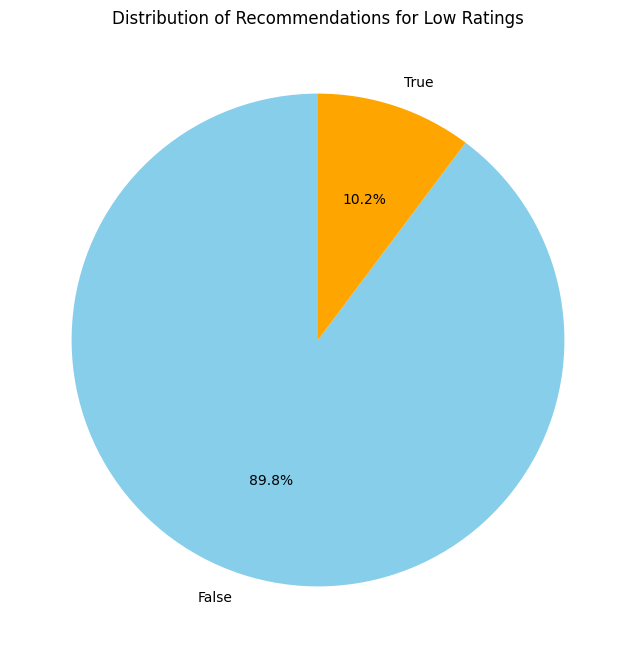

In [92]:
lowRatingAndRecom = df_updated[~df_updated['doRecommend'].isna() & (df_updated['rating']<3)]
counts = lowRatingAndRecom['doRecommend'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
plt.title('Distribution of Recommendations for Low Ratings')
plt.show()

In [118]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def sentiment_scores(text):
    sentiment = analyze_sentiment(text)
    if sentiment > 0.5:
        return 5
    elif 0.2 < sentiment <= 0.5:
        return 4
    elif -0.2 <= sentiment <= 0.2:
        return 3
    elif -0.5 <= sentiment < -0.2:
        return 2
    else:
        return 1



In [120]:
df_updated['rating'] = df_updated[df_updated['doRecommend'].isna() & df_updated['rating'].isna()]['text'].apply(sentiment_scores)

In [114]:
df_updated['text' ].fillna('Five Stars', inplace=True)

In [115]:
df_updated['doRecommend'].fillna(False, inplace=True)
df_updated['numHelpful'].fillna(0, inplace=True)

In [102]:
df_updated['doRecommend'].value_counts()

True     32682
False     1978
Name: doRecommend, dtype: int64

In [128]:
df_updated['rating'].fillna(df_updated[ df_updated['rating'].isna()]['text'].apply(sentiment_scores), inplace=True)

In [103]:
df_updated['doRecommend'].value_counts()

True     32682
False     1978
Name: doRecommend, dtype: int64

In [129]:
df_updated[df_updated['title'].isna()].iloc[:]

,doRecommend,numHelpful,rating,text,title
3083,False,0,3,A must have item.,NaN
21953,True,1,4,I like it. I use mostly for music.,NaN
25515,True,0,4,I was totally stoked about this product becaus...,NaN
28578,True,0,5,I'm in LOVE with ALEXA!!,NaN
28680,True,1,4,"Love it ! I started with a kindle,then a fire ...",NaN


In [112]:
df_updated['numHelpful'] = df_updated['numHelpful'].astype('int')


In [125]:
df_updated[ df_updated['rating'].isna()]

,doRecommend,numHelpful,rating,text,title
0,True,0,NaN,This product so far has not disappointed. My c...,Kindle
1,True,0,NaN,great for beginner or experienced person. Boug...,very fast
2,True,0,NaN,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,True,0,NaN,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,True,0,NaN,I bought this for my grand daughter when she c...,Fantastic Tablet for kids
...,...,...,...,...,...
34655,False,0,NaN,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...
34656,False,0,NaN,Amazon should include this charger with the Ki...,Should be included
34657,False,0,NaN,Love my Kindle Fire but I am really disappoint...,Disappointing Charger
34658,False,0,NaN,I was surprised to find it did not come with a...,Not worth the money


In [ ]:
df_updated = df_updated.drop('title', axis=1)

In [ ]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Contradictions

In [ ]:
contractions_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot",
                   "can't've": "cannot have", "'cause": "because", "could've": "could have",
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not",
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will",
                   "he'll've": "he he will have", "he's": "he is", "how'd": "how did",
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
                   "I'll've": "I will have","I'm": "I am", "I've": "I have",
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will",
                   "i'll've": "i will have","i'm": "i am", "i've": "i have",
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
                   "it'll": "it will", "it'll've": "it will have","it's": "it is",
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not",
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have",
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
                   "she's": "she is", "should've": "should have", "shouldn't": "should not",
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is",
                   "there'd": "there would", "there'd've": "there would have","there's": "there is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
                   "they'll've": "they will have", "they're": "they are", "they've": "they have",
                   "to've": "to have", "wasn't": "was not", "we'd": "we would",
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                   "we're": "we are", "we've": "we have", "weren't": "were not",
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                   "what's": "what is", "what've": "what have", "when's": "when is",
                   "when've": "when have", "where'd": "where did", "where's": "where is",
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have",
                   "who's": "who is", "who've": "who have", "why's": "why is",
                   "why've": "why have", "will've": "will have", "won't": "will not",
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [ ]:
import re
contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
    if isinstance(s, str):
        def replace(match):
            return contractions_dict[match.group(0)]

        return contractions_re.sub(replace, s)
    else:
        return s

In [ ]:
df_updated['expanded_text']  = df_updated['text'].apply(expand_contractions)

In [ ]:
from transformers import pipeline
qa_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad", tokenizer="distilbert-base-cased")

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:

threshold = .3
questions = [
    "Do you love it?",
    "How good is it?",
    "How expensive is it?",
    "Do you recommend it?"
]

def match_questions_to_reviews(review, questions):
    matches = []
    for question in questions:
        result = qa_pipeline(question=question, context=review)
        matches.append((question, result["answer"], result["score"]))
    return matches

def check_reviews(review):
    question_matches = match_questions_to_reviews(review, questions)

    for question, answer, score in question_matches:

        if score >=threshold:
          return True

    return False


df_updated['Taken'] = df_updated['expanded_text'].apply(check_reviews)


In [ ]:
df_updated.to_csv('/content/drive/MyDrive/PhD/NLP/final/qa_reviews.csv')

## After Question Answer


In [130]:
# Libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [135]:


df_updated = pd.read_csv('/content/drive/MyDrive/PhD/NLP/final/qa_reviews.csv')

In [136]:
df_updated= df_updated[df_updated['Taken']==True]
df_updated = df_updated.drop(['Taken','Unnamed: 0'], axis=1)

In [148]:
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def process_text(text):
    if isinstance(text, str):
        text = re.sub(re.compile('<.*?>'), '', text)


        text = re.sub('[^A-Za-z0-9]+', ' ', text)
        sentences = sent_tokenize(text)

        stop_words = set(stopwords.words('english'))
        result_text = [
            ' '.join(
                WordNetLemmatizer().lemmatize(word.lower())
                for word in word_tokenize(sentence)
                if word.lower() not in stop_words and word.isalpha()
            )
            for sentence in sentences
        ]


        result_text = ' '.join(result_text)

        return result_text
    else:
        return ''


In [149]:
df_updated['process_text'] = df_updated['expanded_text'].apply(process_text)

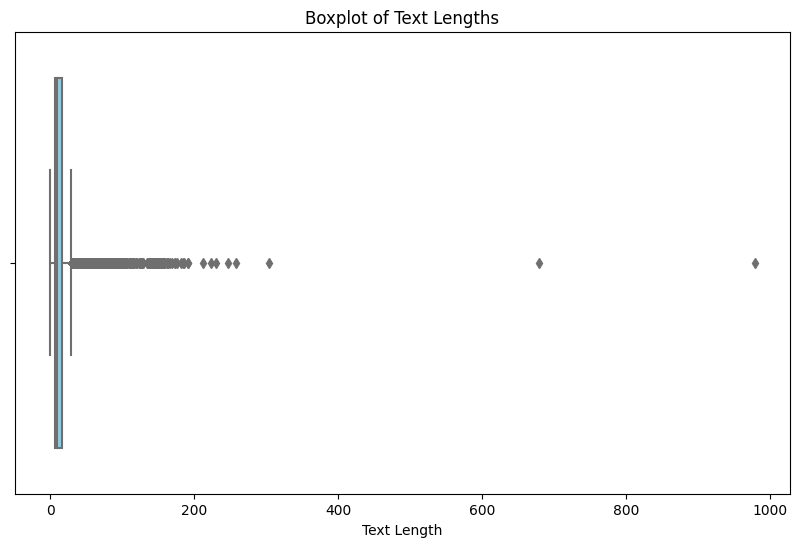

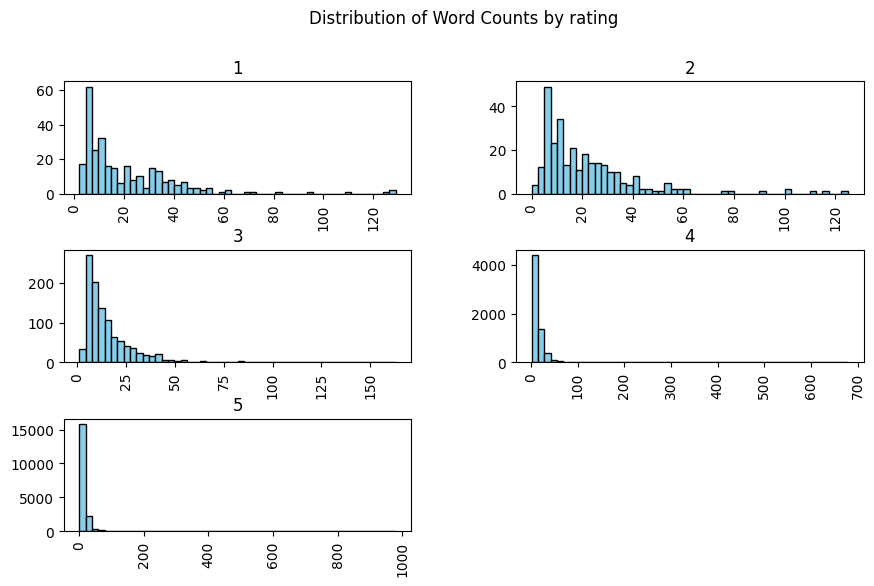

In [139]:
df_with_length = df_updated
df_with_length['size'] = df_updated['process_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_with_length['size'], color='skyblue')
plt.xlabel('Text Length')
plt.title('Boxplot of Text Lengths')
plt.show()



df_with_length.hist(column='size', bins=50, color='skyblue', edgecolor='black', by='rating', figsize=(10, 6))
plt.suptitle('Distribution of Word Counts by rating', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

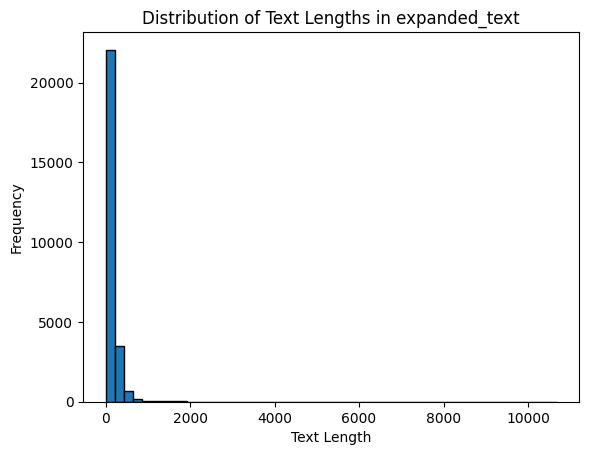

In [140]:
plt.hist(df_updated['expanded_text'].apply(len), bins=50, edgecolor='black')
plt.title('Distribution of Text Lengths in expanded_text')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()



Top 5 Most Frequent Word Lengths in the Corpus:
Length 4: 99246 occurrences
Length 5: 66325 occurrences
Length 6: 60815 occurrences
Length 3: 41635 occurrences
Length 7: 40882 occurrences


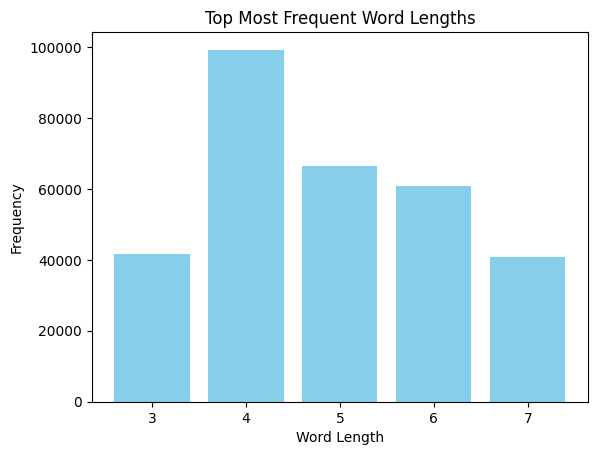

In [141]:
def top_k_word_lengths(corpus, k):
    words = re.findall(r'\b\w+\b', corpus.lower())
    word_lengths = Counter(map(len, words))
    return word_lengths.most_common(k)

def plot_word_lengths(word_lengths):
    lengths, counts = zip(*word_lengths)
    plt.bar(lengths, counts, color='skyblue')
    plt.title('Top Most Frequent Word Lengths')
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.show()


corpus = ' '.join(df_updated['process_text'])
k = 5

result = top_k_word_lengths(corpus, k)

print(f"Top {k} Most Frequent Word Lengths in the Corpus:")
for length, count in result:
    print(f"Length {length}: {count} occurrences")

plot_word_lengths(result)


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

X_train, X_test, y_train, y_test = train_test_split(df_updated['process_text'], df_updated['rating'], test_size=0.3, random_state=42)


In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(max_features =10)
tfidfVectorizer.fit_transform(X_train)

top_phrase= tfidfVectorizer.get_feature_names_out() # the features
print(f'Top 10 important terms of train data are: {", ".join(top_phrase[:])}')



Top 10 important terms of train data are: amazon, bought, easy, good, great, kindle, love, one, tablet, use


# references


* [Text Normalization](https://towardsdatascience.com/text-normalization-for-natural-language-processing-nlp-70a314bfa646)

* [Tfidf](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

* [Matplotlib](https://www.datacamp.com/tutorial/matplotlib-tutorial-python)

